In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
from scipy.interpolate import spline


import matplotlib.pyplot as plt

File = "./TSM.csv"
shit = pd.read_csv(File)



shit['DateTime'] = pd.to_datetime(shit['Date'])
shit = shit.set_index('DateTime')

In [2]:
shit.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Toshiki\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


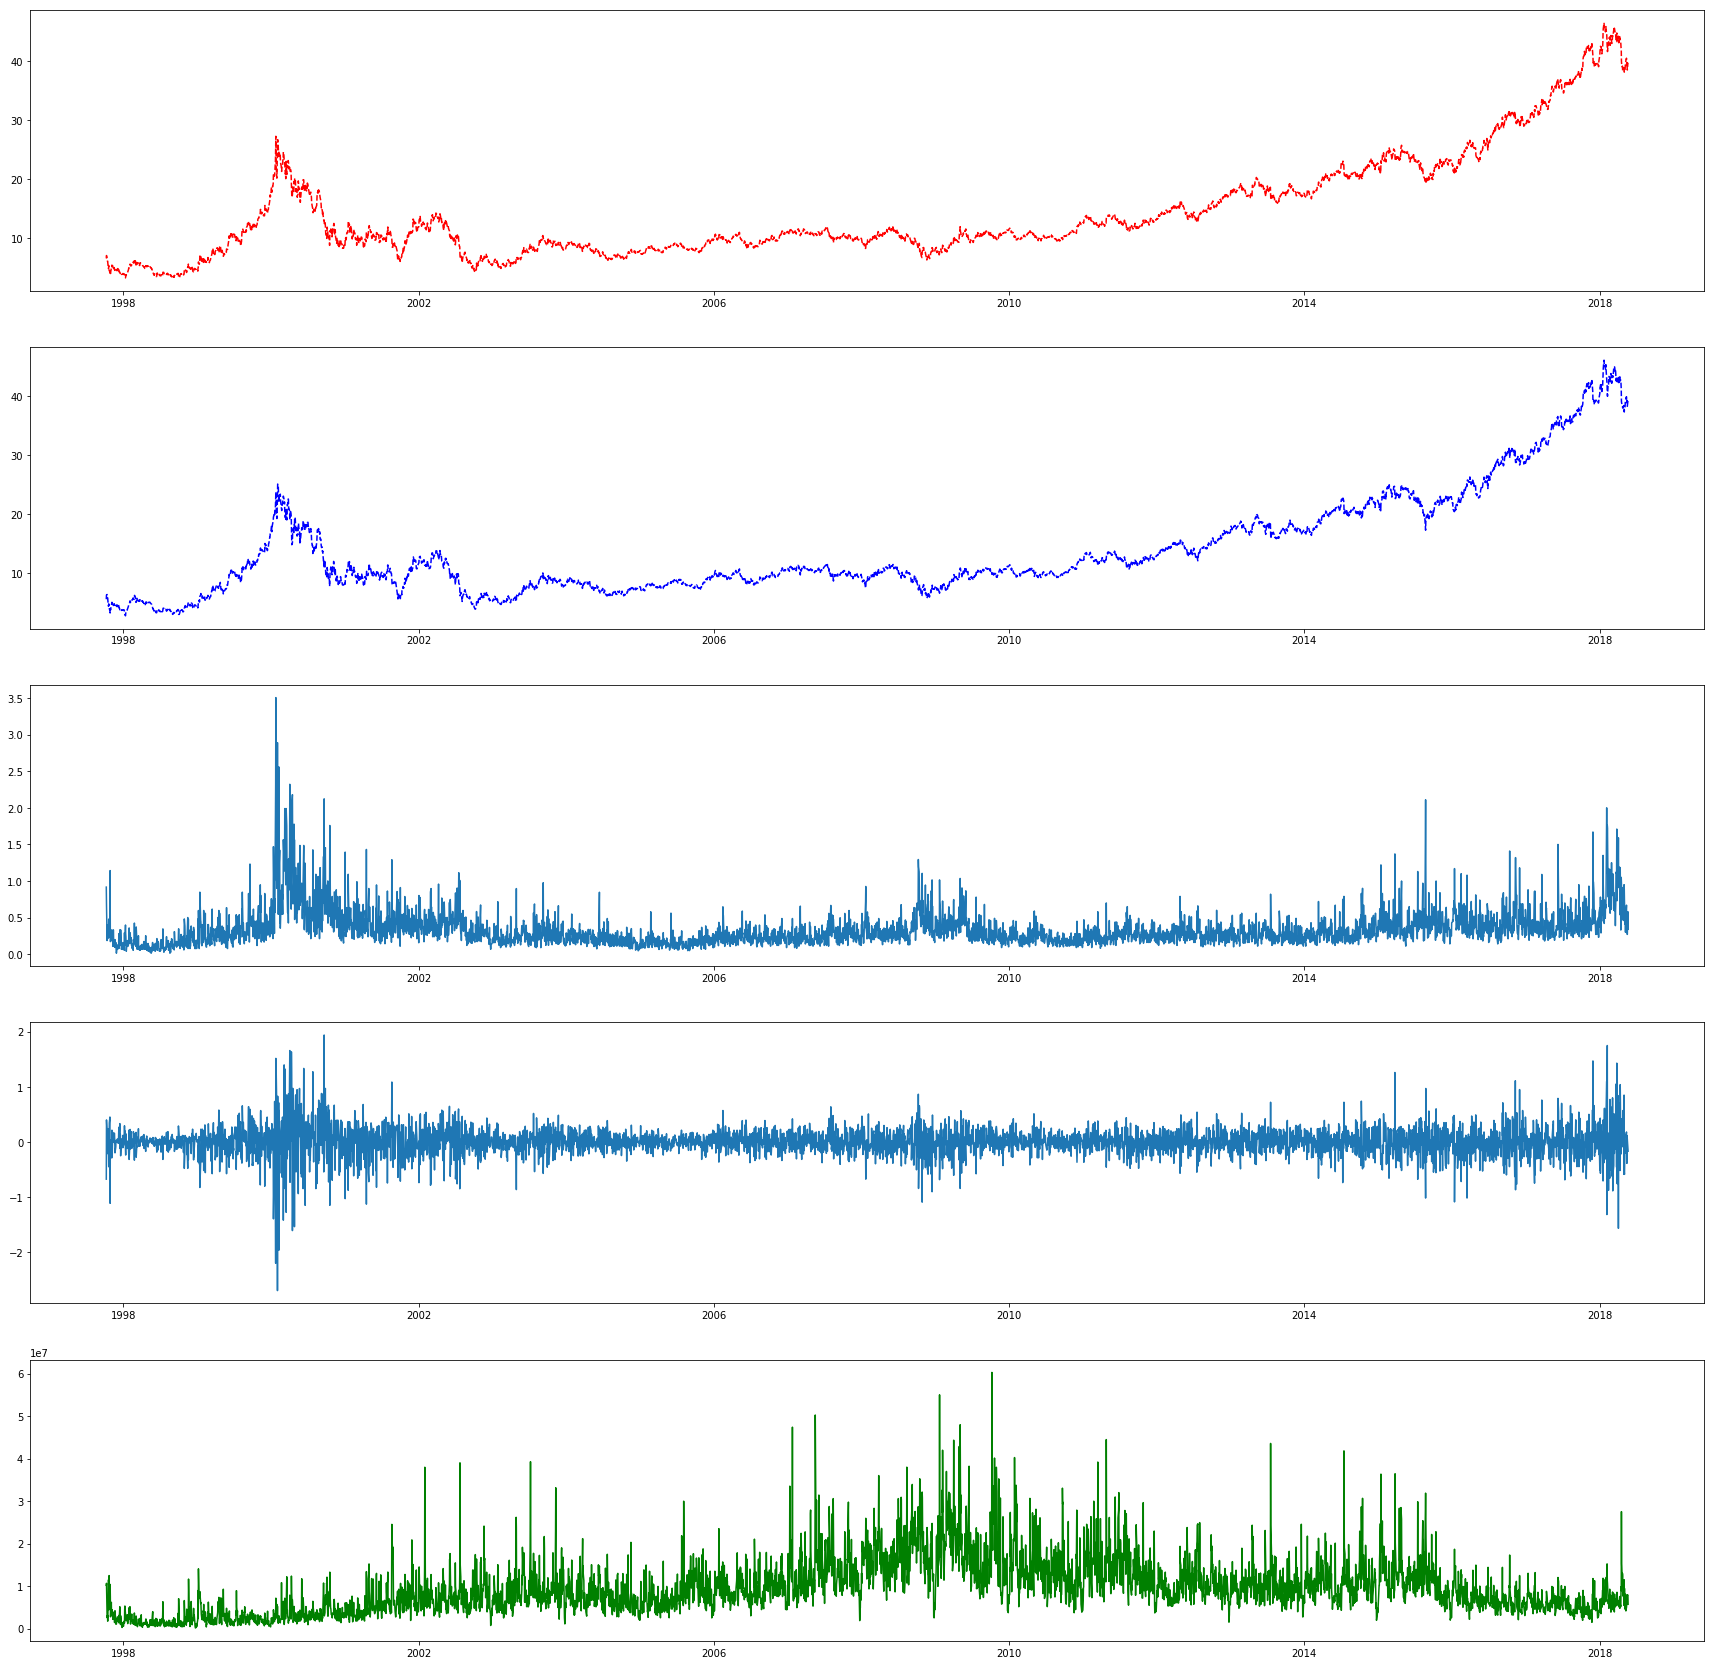

In [3]:
#plt.plot_date(shit['Date'], shit['Open'])
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 30)



plt.close()

plt.figure(1)
plt.subplot(511)
plt.plot_date(shit.index, shit['High'], 'r--')

plt.subplot(512)
plt.plot_date(shit.index, shit['Low'], 'b--')

plt.subplot(513)
plt.plot_date(shit.index, (shit['High'] - shit['Low']), '-')

plt.subplot(514)
plt.plot_date(shit.index, (shit['Open'] - shit['Close']), '-')

plt.subplot(515)
plt.plot_date(shit.index, shit['Volume'], 'g-')

plt.show()

Populating the interactive namespace from numpy and matplotlib


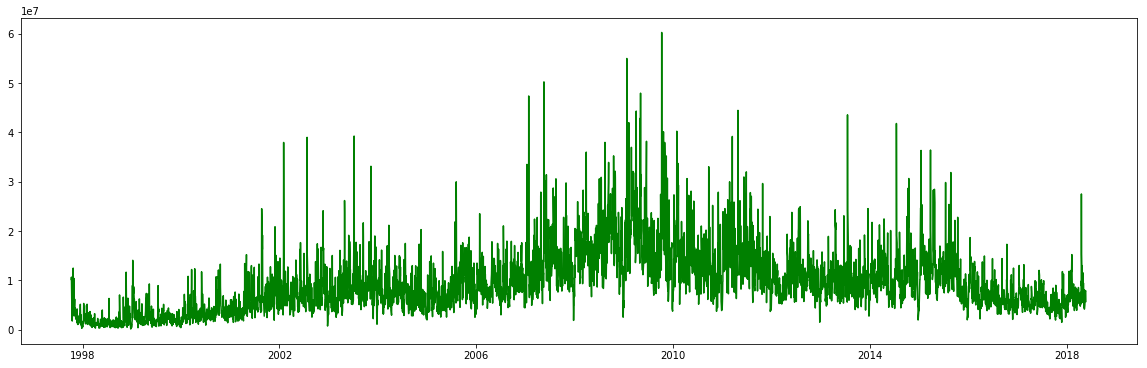

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)


plt.close()
plt.plot_date(shit.index, shit['Volume'], 'g-')
plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [5]:
#resample by week
#shit['DateTime'].resample('W', how='sum')

In [5]:
#Smoothing by week/month (NOT causal filter)

df = shit.resample('M').sum()

In [6]:
shit.iloc[1000].index

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Populating the interactive namespace from numpy and matplotlib


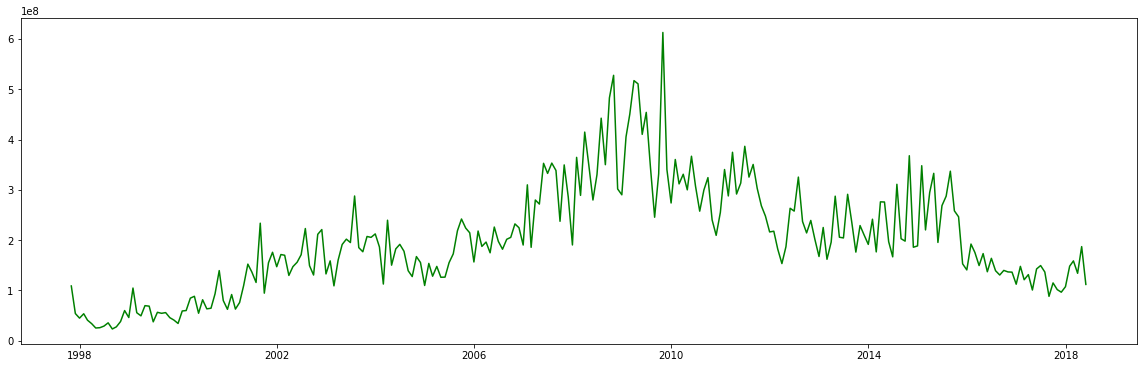

In [7]:
df.index

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)


plt.close()
plt.plot_date(df.index, df["Volume"], 'g-')
plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [8]:
for index, row in shit.head(1).iterrows():
    asdf = index
    for i in range(20):
        asdf += datetime.timedelta(days=1)
    print(shit.loc[index]["Low"])

5.64604


In [9]:
shit.index

DatetimeIndex(['1997-10-09', '1997-10-10', '1997-10-13', '1997-10-14',
               '1997-10-15', '1997-10-16', '1997-10-17', '1997-10-20',
               '1997-10-21', '1997-10-22',
               ...
               '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-14',
               '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-21', '2018-05-22'],
              dtype='datetime64[ns]', name='DateTime', length=5188, freq=None)

In [10]:
#causal filter
def cfilter(df, interval, attr):
    """Pass in a pandas dataframe, a number of days, and column name
    and get back a dataframe with a mean value causal filter applied to each row over each interval"""
    indeces = df.index
    return_dict = {} #smoothed dataset
    for index, row in df.iterrows():
        date_min = index - datetime.timedelta(days=interval + 1)
        date_current = index
        datesum = 0           #stores sum of values in interval
        dateind = 0           #stores number of valid dates per interval
        while date_min != date_current:
            date_min += datetime.timedelta(days=1)
            #check if date exists in dataset
            if date_min in indeces:
                dateind += 1
                datesum += df.loc[date_min][attr]
        
        #if there are no attributes within the cutoff date, just add current index
        if dateind == 0:
            return_dict[date_current] = row[attr]
        else:
            return_dict[date_current] = datesum/dateind
        
    return return_dict
            
            
            
        

In [11]:
x = cfilter(shit, 30, "Low")

In [12]:
xd = pd.DataFrame.from_dict(x, orient='index')

In [13]:
#rename the first column
xd.columns = ['Low']

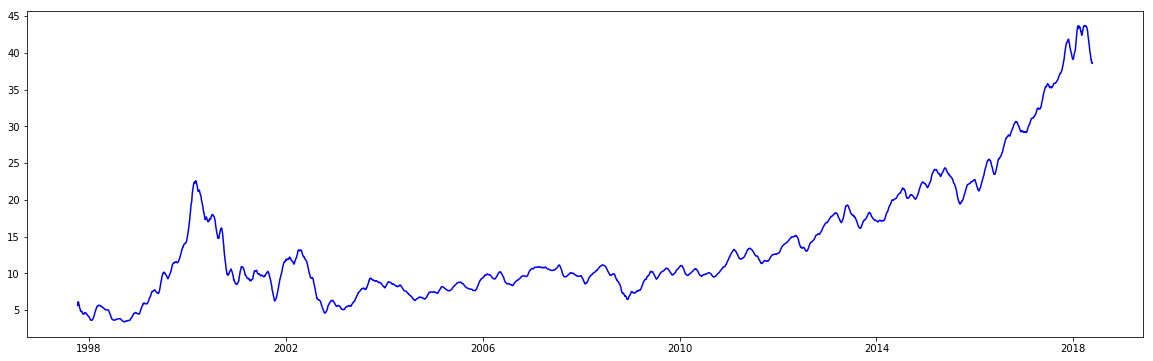

In [15]:
plt.close()
plt.plot_date(xd.index, xd["Low"], 'b-')
plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [16]:
#output dataset is same length as original
len(xd) == len(shit)

True

In [17]:
"""The idea is that volume is related to the second derivative of the price. 

First, for every column in your data set, please generate an average of the data at each date. 

The average should be for 3 days, 1 week, 1 month and 3 months. 

Then generate the velocity and acceleration of the stock price. 

The daily velocity = closing price - opening price. 

The acceleration is today's velocity - yesterday's velocity. 

Then generate the average of the velocity and acceleration for 3 days, 1 week, 1 month and 3 months. 
"""

"The idea is that volume is related to the second derivative of the price. \n\nFirst, for every column in your data set, please generate an average of the data at each date. \n\nThe average should be for 3 days, 1 week, 1 month and 3 months. \n\nThen generate the velocity and acceleration of the stock price. \n\nThe daily velocity = closing price - opening price. \n\nThe acceleration is today's velocity - yesterday's velocity. \n\nThen generate the average of the velocity and acceleration for 3 days, 1 week, 1 month and 3 months. \n"

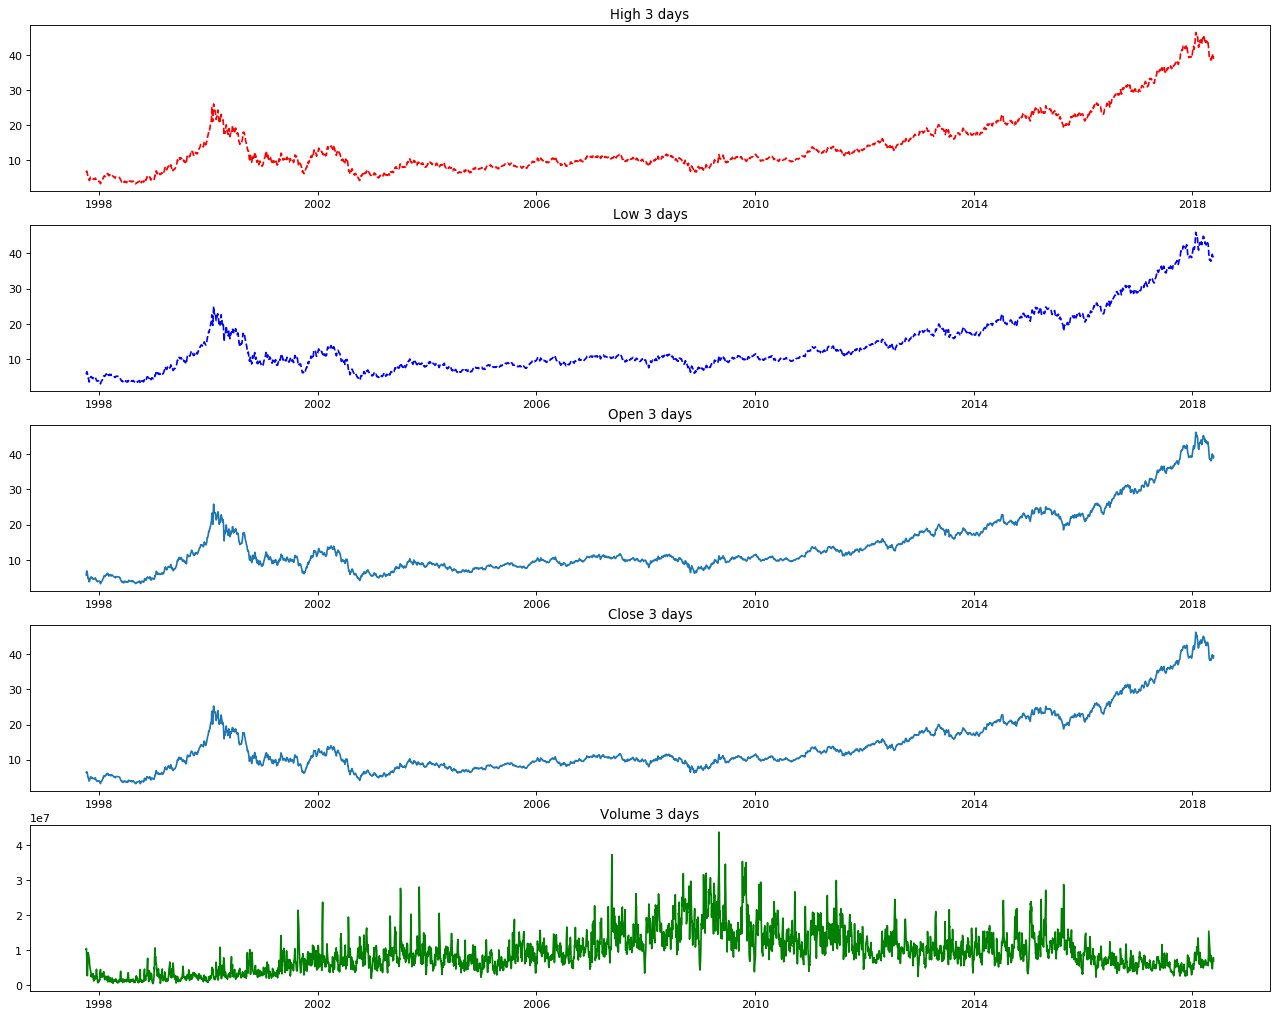

In [27]:
"""average 3 days"""
threedays = 3

#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'


plt.close()

plt.figure(1, figsize=(20, 16), dpi=80)
plt.subplot(511)
xd = pd.DataFrame.from_dict(cfilter(shit, threedays, "High"), orient='index')
xd.columns = ['High']
plt.plot_date(xd.index, xd['High'], 'r--')
plt.title("High 3 days")

plt.subplot(512)
xd = pd.DataFrame.from_dict(cfilter(shit, threedays, "Low"), orient='index')
xd.columns = ['Low']
plt.plot_date(xd.index, xd['Low'], 'b--')
plt.title("Low 3 days")


plt.subplot(513)
xd = pd.DataFrame.from_dict(cfilter(shit, threedays, "Open"), orient='index')
xd.columns = ['Open']
plt.plot_date(xd.index, xd['Open'], '-')
plt.title("Open 3 days")


plt.subplot(514)
xd = pd.DataFrame.from_dict(cfilter(shit, threedays, "Close"), orient='index')
xd.columns = ['Close']
plt.plot_date(xd.index, xd['Close'], '-')
plt.title("Close 3 days")


plt.subplot(515)
xd = pd.DataFrame.from_dict(cfilter(shit, threedays, "Volume"), orient='index')
xd.columns = ['Volume']
plt.plot_date(xd.index, xd['Volume'], 'g-')
plt.title("Volume 3 days")



#plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

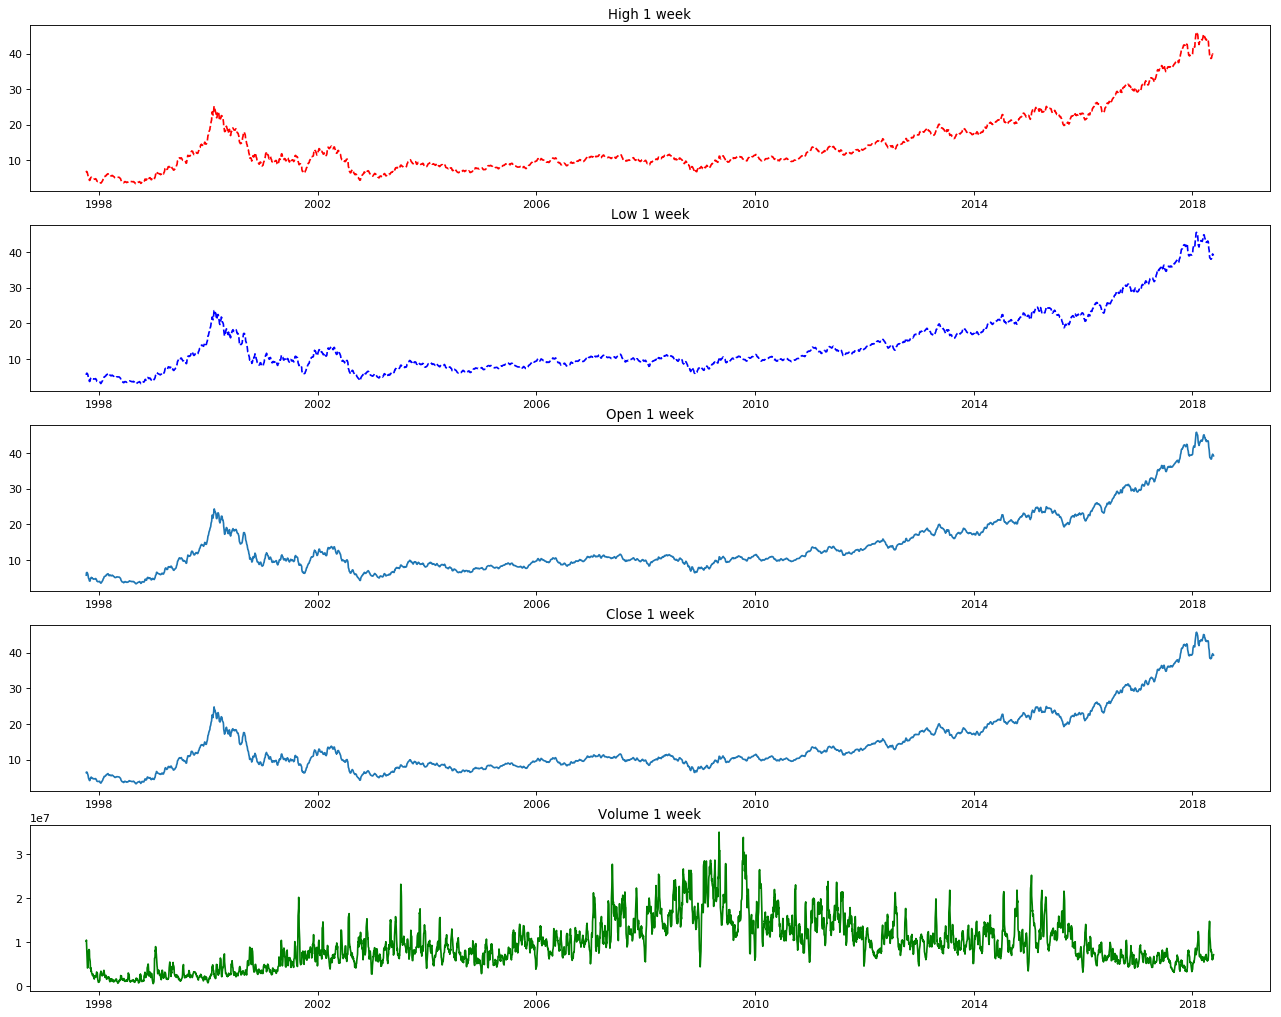

In [26]:
"""average 1 week"""
week = 7

#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'


plt.close()

plt.figure(1, figsize=(20, 16), dpi=80)
plt.subplot(511)
xd = pd.DataFrame.from_dict(cfilter(shit, week, "High"), orient='index')
xd.columns = ['High']
plt.plot_date(xd.index, xd['High'], 'r--')
plt.title("High 1 week")

plt.subplot(512)
xd = pd.DataFrame.from_dict(cfilter(shit, week, "Low"), orient='index')
xd.columns = ['Low']
plt.plot_date(xd.index, xd['Low'], 'b--')
plt.title("Low 1 week")


plt.subplot(513)
xd = pd.DataFrame.from_dict(cfilter(shit, week, "Open"), orient='index')
xd.columns = ['Open']
plt.plot_date(xd.index, xd['Open'], '-')
plt.title("Open 1 week")


plt.subplot(514)
xd = pd.DataFrame.from_dict(cfilter(shit, week, "Close"), orient='index')
xd.columns = ['Close']
plt.plot_date(xd.index, xd['Close'], '-')
plt.title("Close 1 week")


plt.subplot(515)
xd = pd.DataFrame.from_dict(cfilter(shit, week, "Volume"), orient='index')
xd.columns = ['Volume']
plt.plot_date(xd.index, xd['Volume'], 'g-')
plt.title("Volume 1 week")



#plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

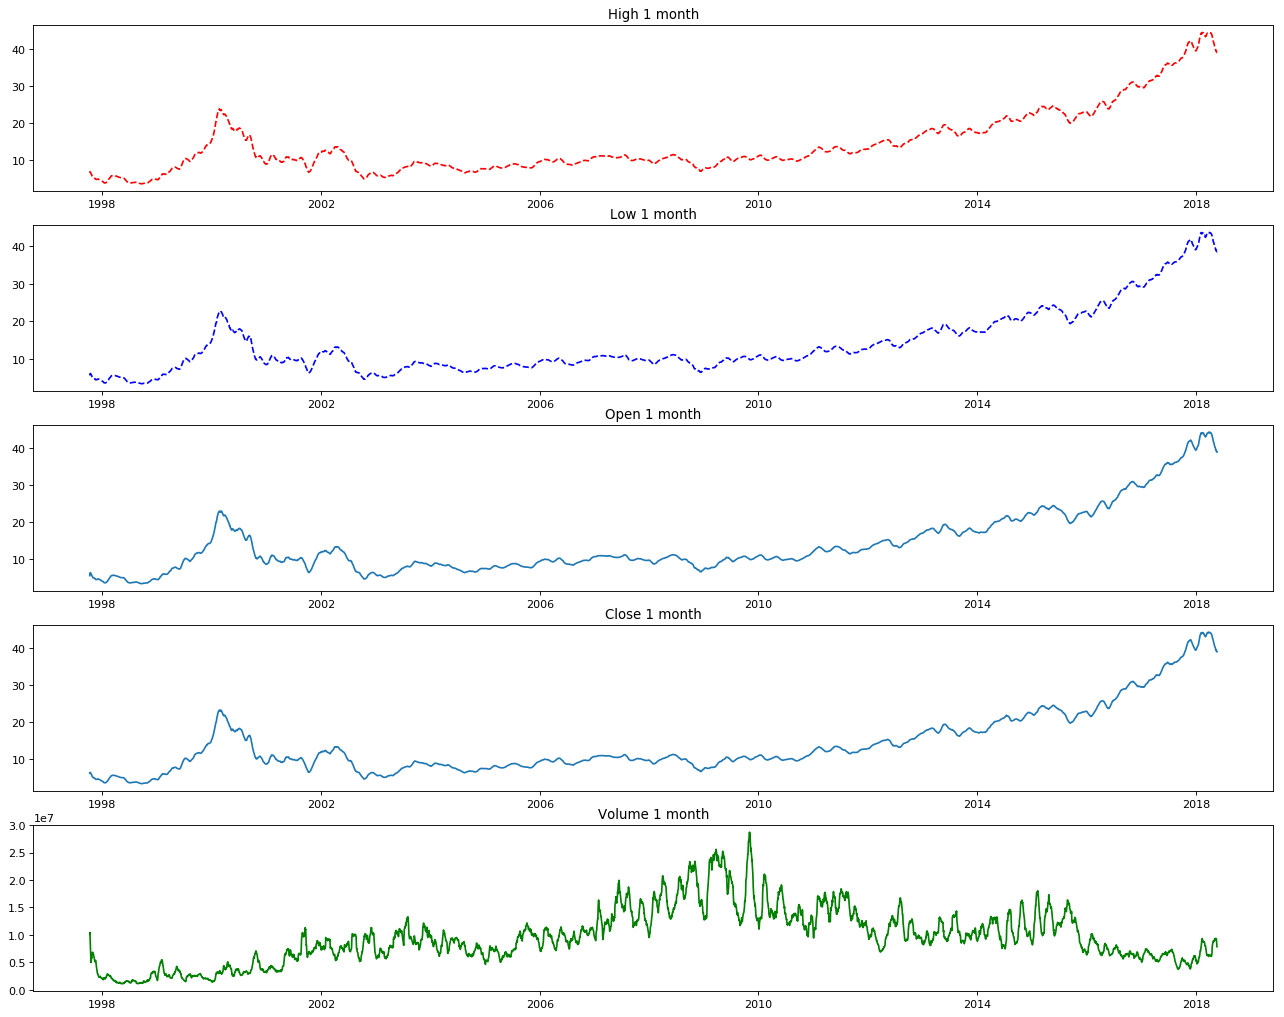

In [25]:
"""Average 1 month"""
month = 30

#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'


plt.close()

plt.figure(1, figsize=(20, 16), dpi=80)
plt.subplot(511)
xd = pd.DataFrame.from_dict(cfilter(shit, month, "High"), orient='index')
xd.columns = ['High']
plt.plot_date(xd.index, xd['High'], 'r--')
plt.title("High 1 month")

plt.subplot(512)
xd = pd.DataFrame.from_dict(cfilter(shit, month, "Low"), orient='index')
xd.columns = ['Low']
plt.plot_date(xd.index, xd['Low'], 'b--')
plt.title("Low 1 month")


plt.subplot(513)
xd = pd.DataFrame.from_dict(cfilter(shit, month, "Open"), orient='index')
xd.columns = ['Open']
plt.plot_date(xd.index, xd['Open'], '-')
plt.title("Open 1 month")


plt.subplot(514)
xd = pd.DataFrame.from_dict(cfilter(shit, month, "Close"), orient='index')
xd.columns = ['Close']
plt.plot_date(xd.index, xd['Close'], '-')
plt.title("Close 1 month")


plt.subplot(515)
xd = pd.DataFrame.from_dict(cfilter(shit, month, "Volume"), orient='index')
xd.columns = ['Volume']
plt.plot_date(xd.index, xd['Volume'], 'g-')
plt.title("Volume 1 month")



#plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

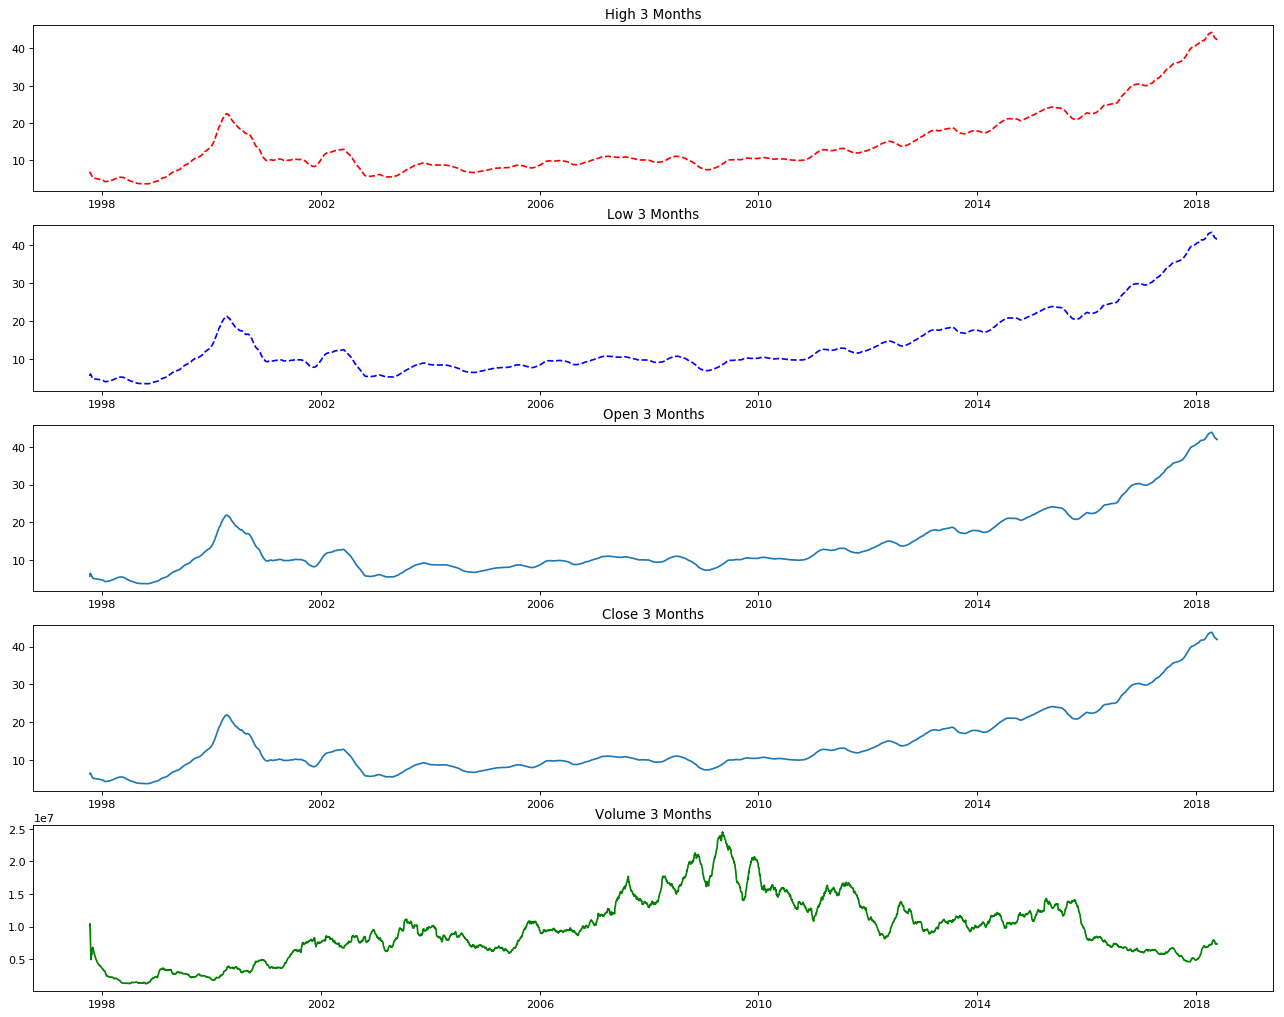

In [24]:
"""Average 3 months"""
threemonth = 90

#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'


plt.close()

plt.figure(1, figsize=(20, 16), dpi=80)
plt.subplot(511)
xd = pd.DataFrame.from_dict(cfilter(shit, threemonth, "High"), orient='index')
xd.columns = ['High']
plt.plot_date(xd.index, xd['High'], 'r--')
plt.title("High 3 Months")

plt.subplot(512)
xd = pd.DataFrame.from_dict(cfilter(shit, threemonth, "Low"), orient='index')
xd.columns = ['Low']
plt.plot_date(xd.index, xd['Low'], 'b--')
plt.title("Low 3 Months")


plt.subplot(513)
xd = pd.DataFrame.from_dict(cfilter(shit, threemonth, "Open"), orient='index')
xd.columns = ['Open']
plt.plot_date(xd.index, xd['Open'], '-')
plt.title("Open 3 Months")


plt.subplot(514)
xd = pd.DataFrame.from_dict(cfilter(shit, threemonth, "Close"), orient='index')
xd.columns = ['Close']
plt.plot_date(xd.index, xd['Close'], '-')
plt.title("Close 3 Months")


plt.subplot(515)
xd = pd.DataFrame.from_dict(cfilter(shit, threemonth, "Volume"), orient='index')
xd.columns = ['Volume']
plt.plot_date(xd.index, xd['Volume'], 'g-')
plt.title("Volume 3 Months")



#plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [33]:
"""daily velocity = closing price - opening price. Add velocity and acceleration to dataframe"""

shit["dailyvel"] = shit["Close"] - shit["Open"]
shit.columns

#The acceleration is today's velocity - yesterday's velocity. 
acc = [0]
for i in range(len(shit) - 1):
    acc.append(shit["dailyvel"][i + 1] - shit["dailyvel"][i])
shit["acceleration"] = acc

#Add columns for normalized velocity and acceleration
shit["velocity_norm"] = (shit["Close"] - shit["Open"]) / ((shit["Close"] + shit["Open"]) / 2)
acc = [0]
for i in range(len(shit) - 1):
    acc.append(shit["velocity_norm"][i + 1] - shit["velocity_norm"][i])
shit["accel_norm"] = acc

Text(0.5,1,'normalized acceleration no average')

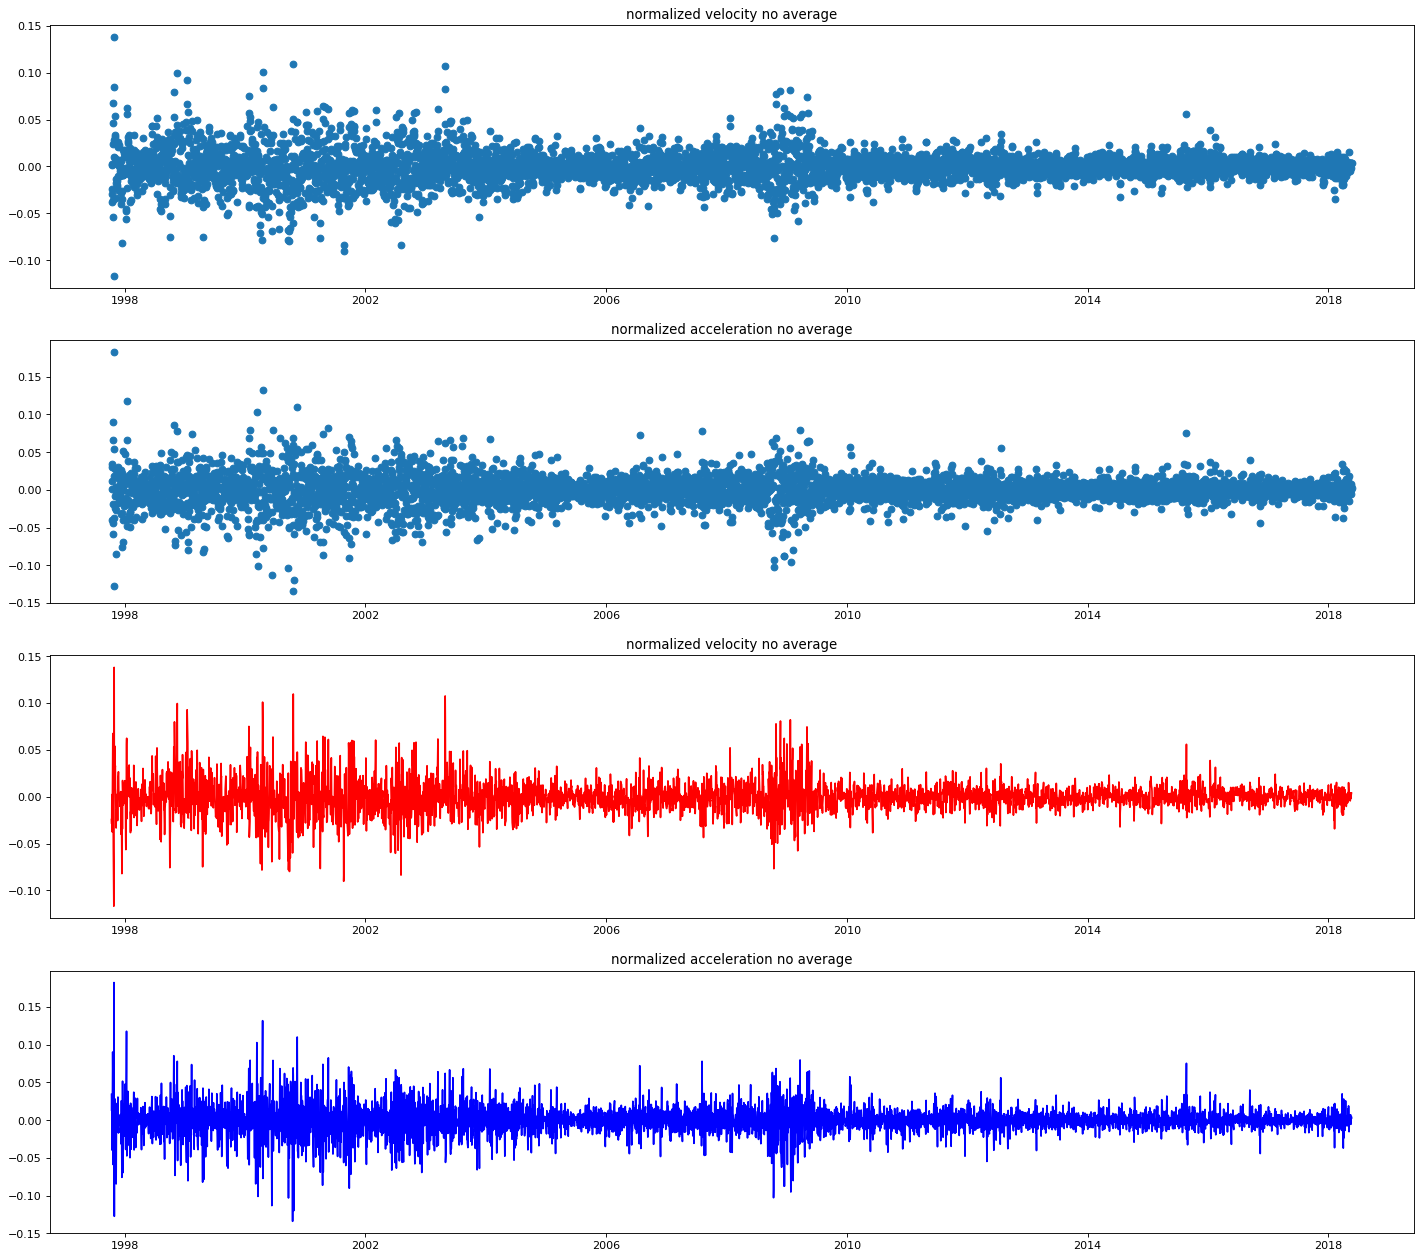

In [52]:
"""1 day normalized"""
plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(411)
x1 = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], 1, "velocity_norm"), orient='index')
x1.columns = ['velocity_norm']
plt.plot_date(x1.index, x1['velocity_norm'], 'o')
plt.title("normalized velocity no average")

plt.subplot(412)
x2 = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], 1, "accel_norm"), orient='index')
x2.columns = ['accel_norm']
plt.plot_date(x2.index, x2['accel_norm'], 'o')
plt.title("normalized acceleration no average")

plt.subplot(413)
plt.plot_date(x1.index, x1['velocity_norm'], '-r')
plt.title("normalized velocity no average")

plt.subplot(414)
plt.plot_date(x2.index, x2['accel_norm'], '-b')
plt.title("normalized acceleration no average")

Text(0.5,1,'normalized acceleration 3 days')

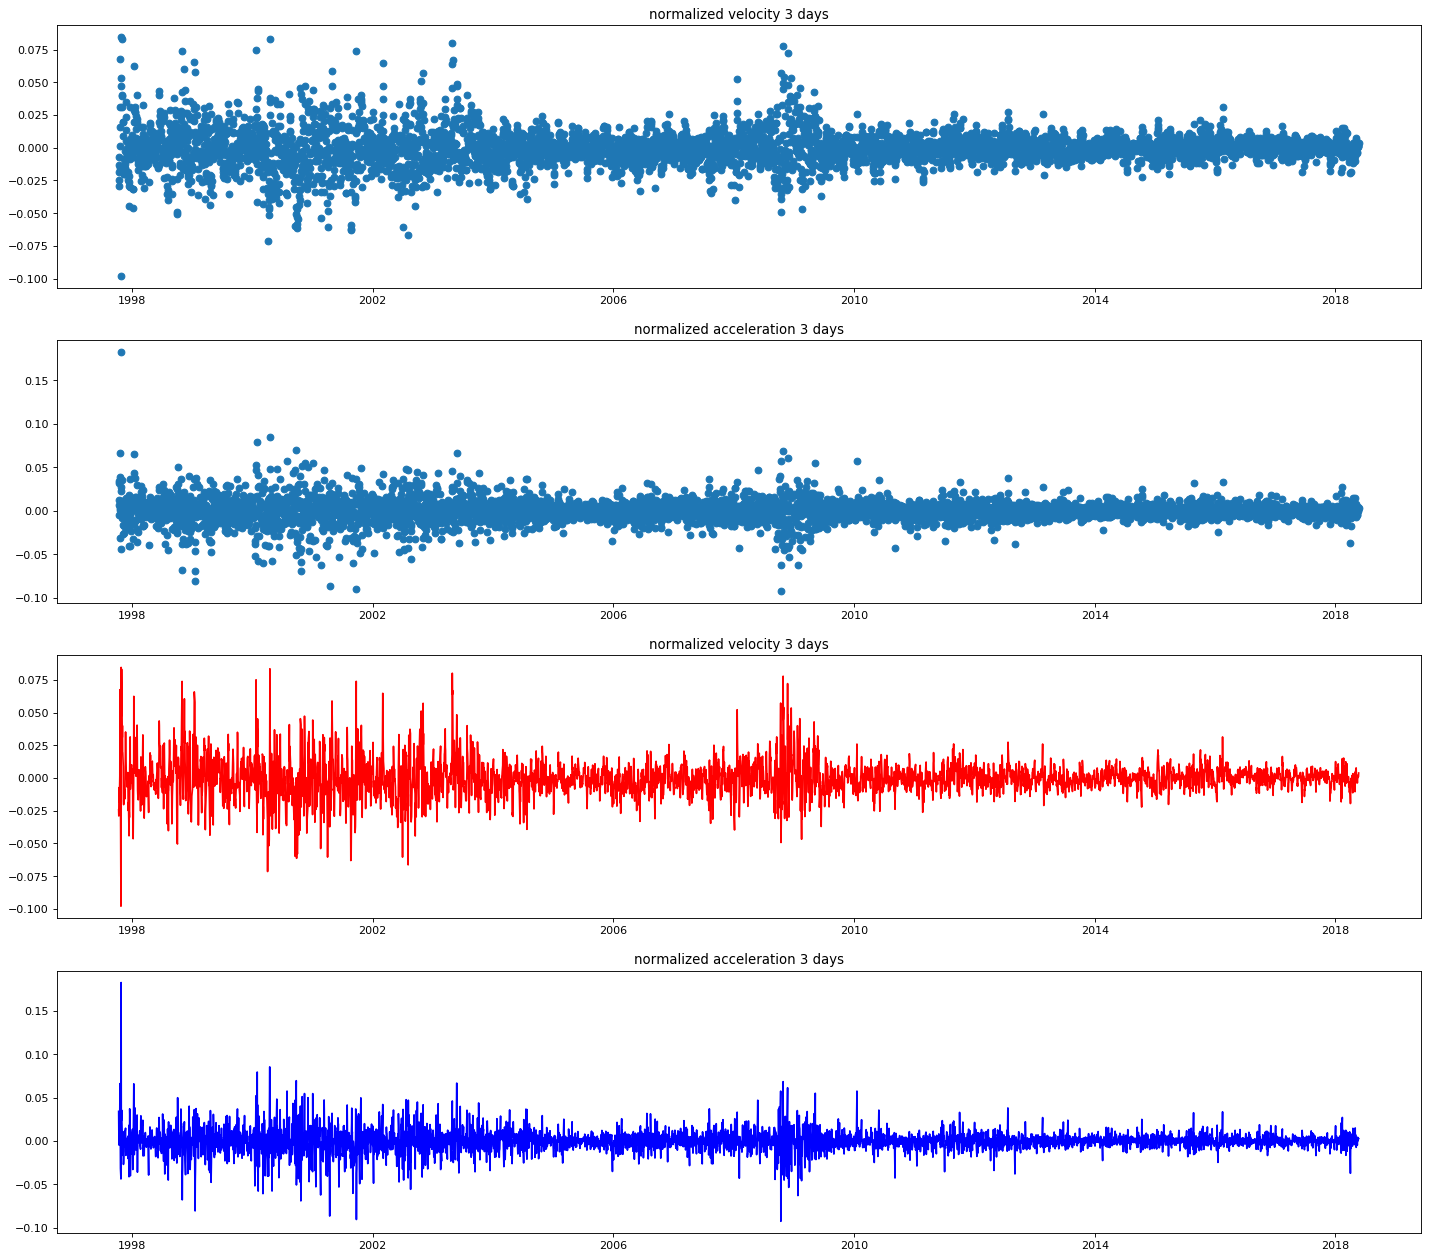

In [51]:
"""3 days normalized"""

plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(411)
x1 = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], 3, "velocity_norm"), orient='index')
x1.columns = ['velocity_norm']
plt.plot_date(x1.index, x1['velocity_norm'], 'o')
plt.title("normalized velocity 3 days")

plt.subplot(412)
x2 = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], 3, "accel_norm"), orient='index')
x2.columns = ['accel_norm']
plt.plot_date(x2.index, x2['accel_norm'], 'o')
plt.title("normalized acceleration 3 days")

plt.subplot(413)
plt.plot_date(x1.index, x1['velocity_norm'], 'r-')
plt.title("normalized velocity 3 days")

plt.subplot(414)
plt.plot_date(x2.index, x2['accel_norm'], 'b-')
plt.title("normalized acceleration 3 days")

Text(0.5,1,'normalized acceleration 1 week')

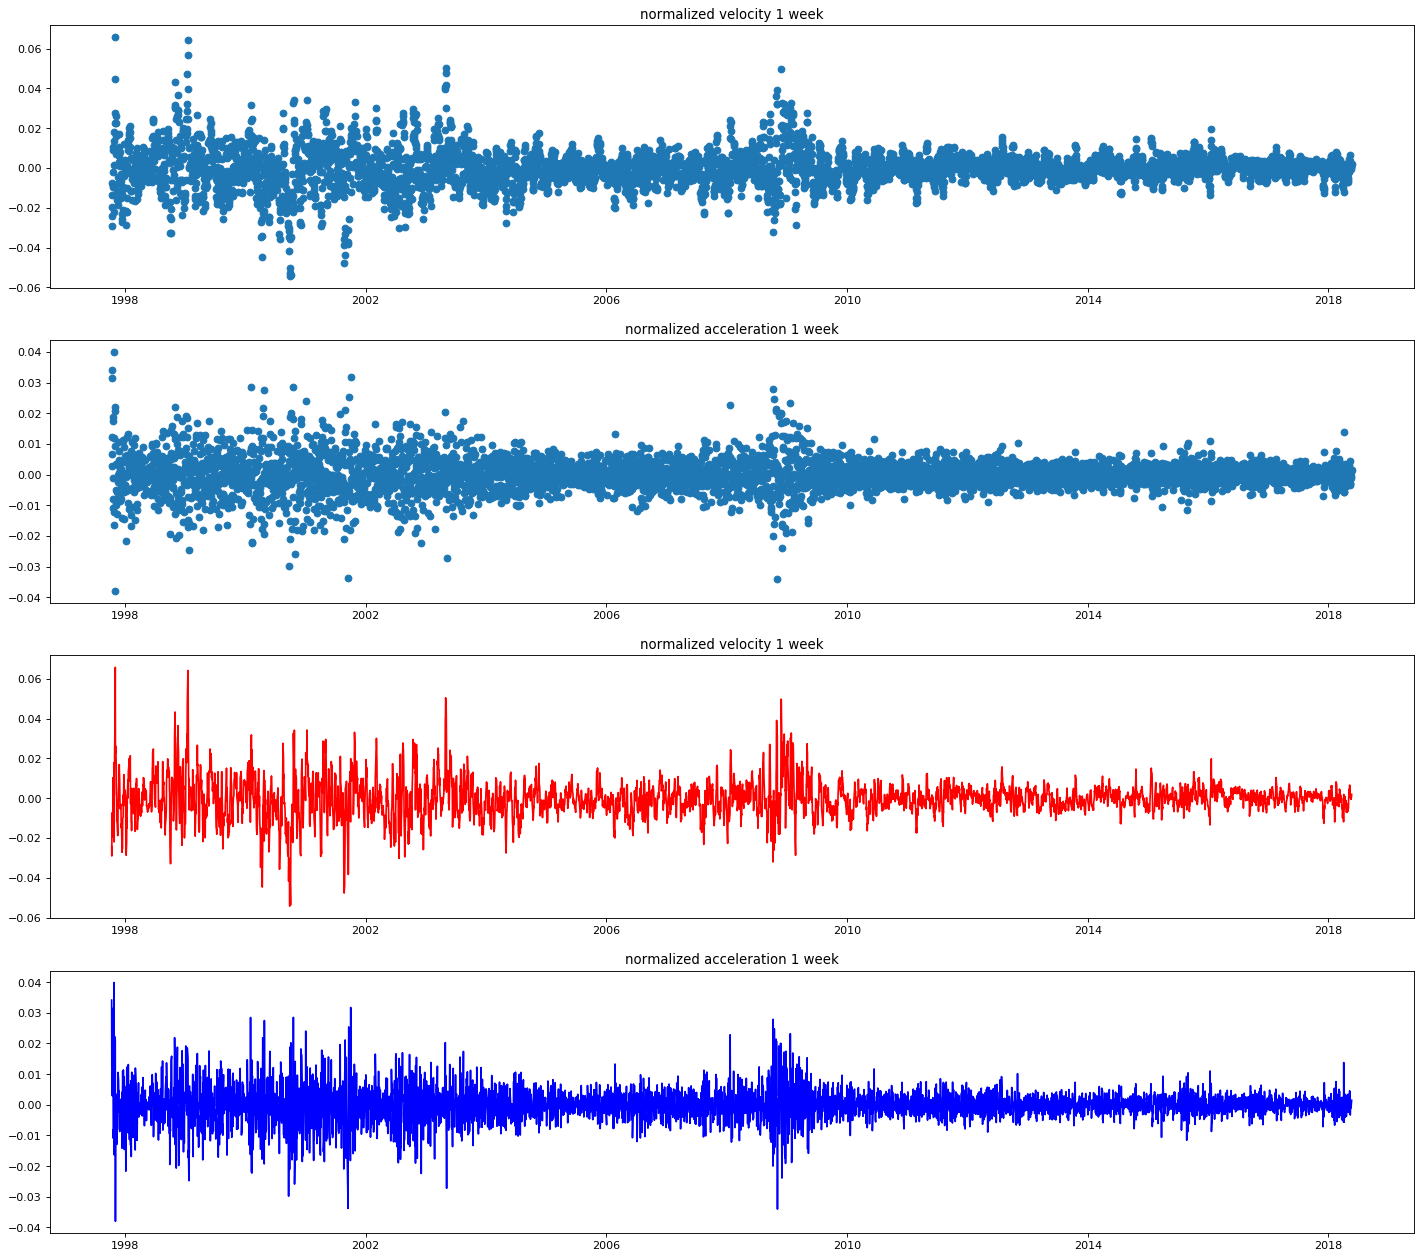

In [50]:
"""1 week normalized"""

plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(411)
x1 = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], 7, "velocity_norm"), orient='index')
x1.columns = ['velocity_norm']
plt.plot_date(x1.index, x1['velocity_norm'], 'o')
plt.title("normalized velocity 1 week")

plt.subplot(412)
x2 = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], 7, "accel_norm"), orient='index')
x2.columns = ['accel_norm']
plt.plot_date(x2.index, x2['accel_norm'], 'o')
plt.title("normalized acceleration 1 week")

plt.subplot(413)
plt.plot_date(x1.index, x1['velocity_norm'], 'r-')
plt.title("normalized velocity 1 week")

plt.subplot(414)
plt.plot_date(x2.index, x2['accel_norm'], 'b-')
plt.title("normalized acceleration 1 week")

Text(0.5,1,'normalized acceleration 1 month')

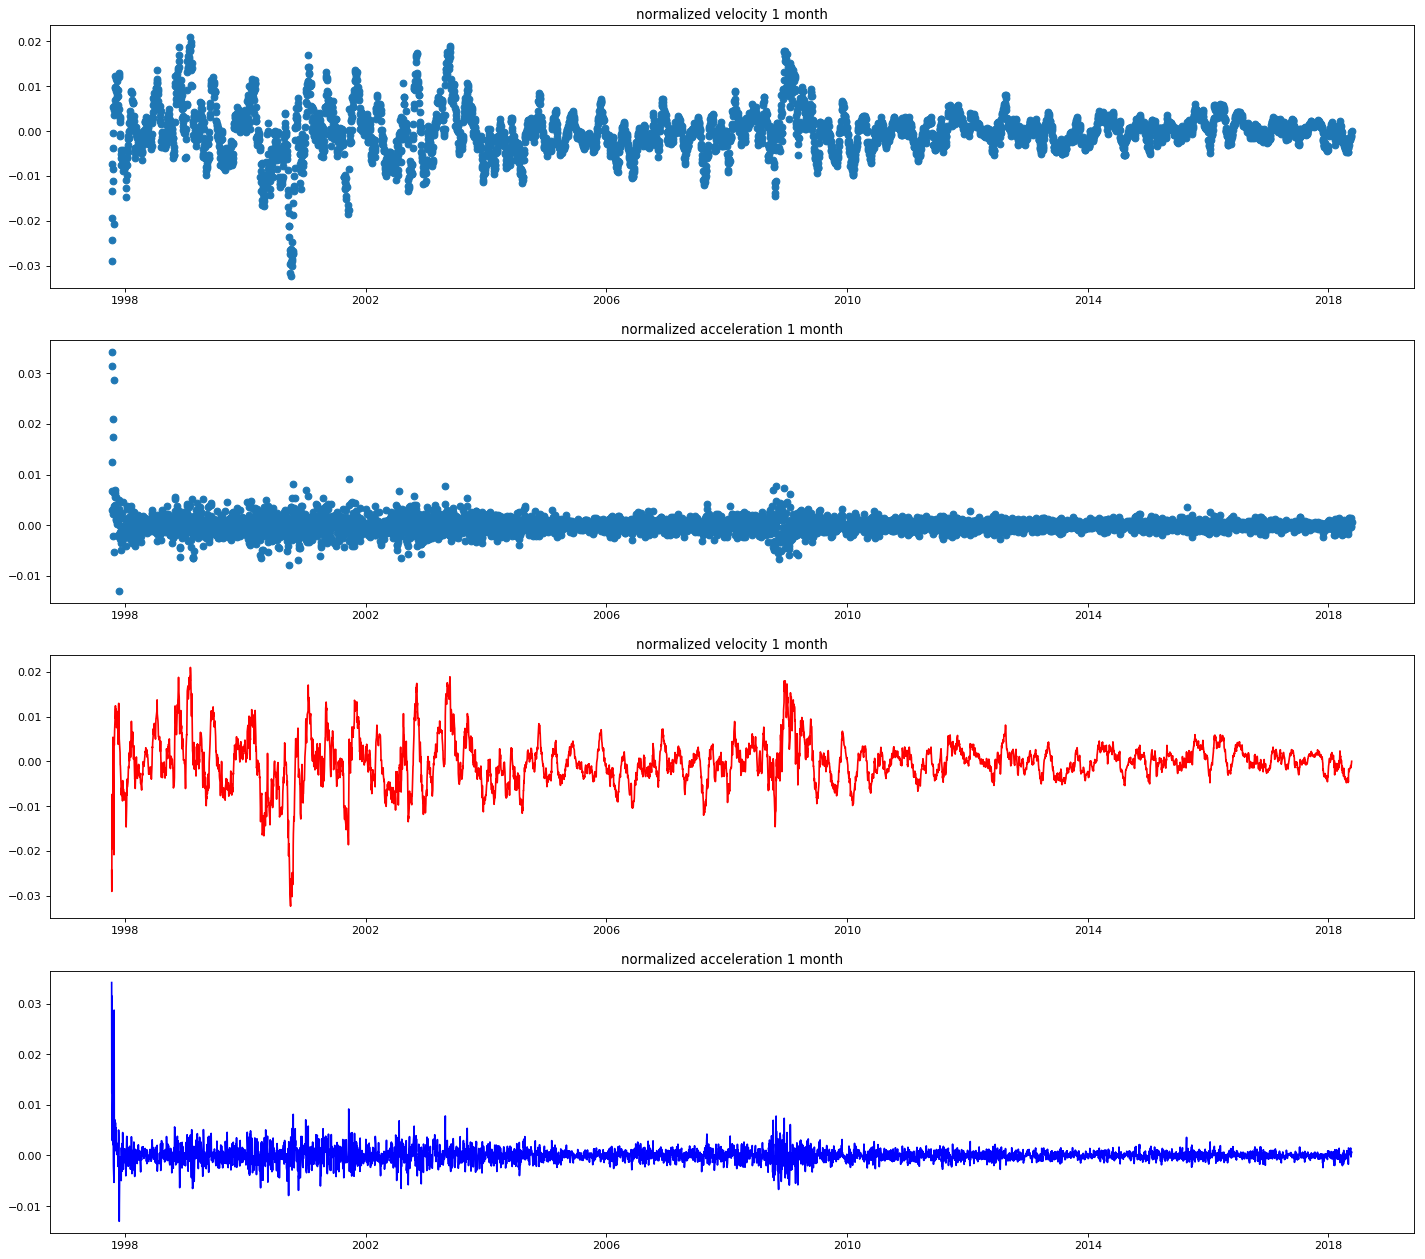

In [49]:
"""1 month normalized"""

plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(411)
x1 = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], 30, "velocity_norm"), orient='index')
x1.columns = ['velocity_norm']
plt.plot_date(x1.index, x1['velocity_norm'], 'o')
plt.title("normalized velocity 1 month")

plt.subplot(412)
x2 = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], 30, "accel_norm"), orient='index')
x2.columns = ['accel_norm']
plt.plot_date(x2.index, x2['accel_norm'], 'o')
plt.title("normalized acceleration 1 month")

plt.subplot(413)
plt.plot_date(x1.index, x1['velocity_norm'], 'r-')
plt.title("normalized velocity 1 month")

plt.subplot(414)
plt.plot_date(x2.index, x2['accel_norm'], 'b-')
plt.title("normalized acceleration 1 month")

Text(0.5,1,'normalized acceleration 3 months')

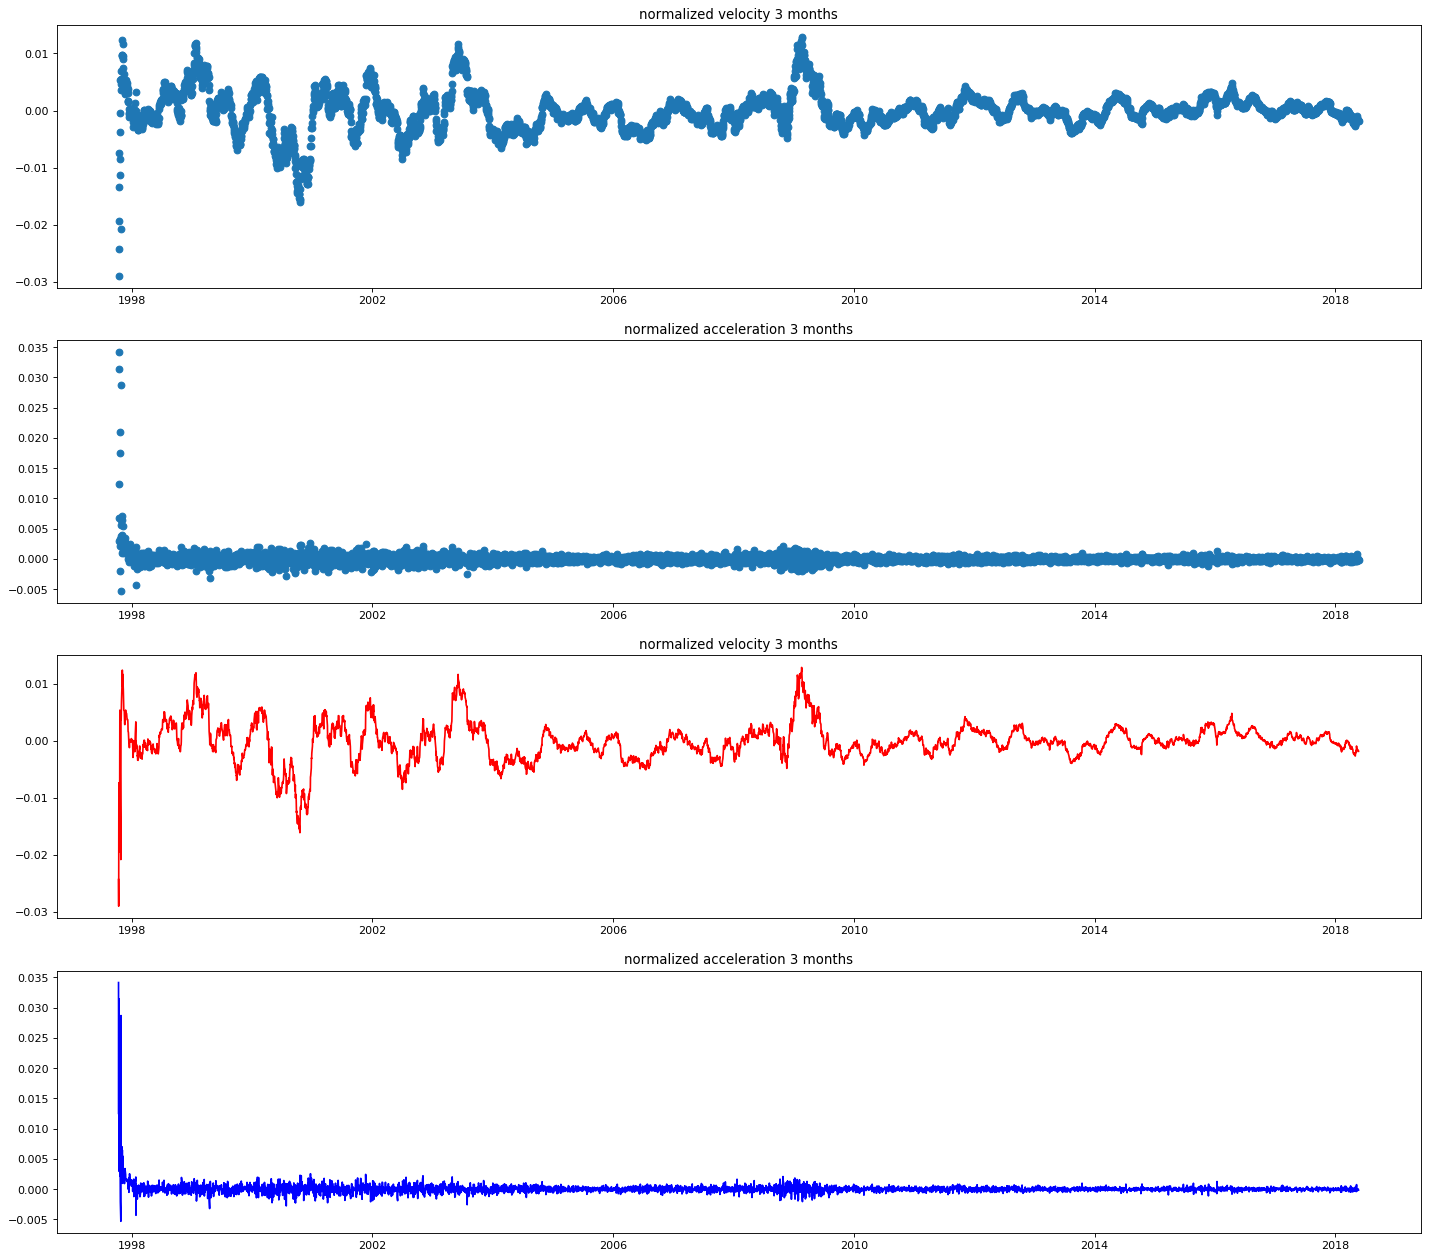

In [48]:
"""3 months normalized"""

plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(411)
x1 = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], 90, "velocity_norm"), orient='index')
x1.columns = ['velocity_norm']
plt.plot_date(x1.index, x1['velocity_norm'], 'o')
plt.title("normalized velocity 3 months")

plt.subplot(412)
x2 = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], 90, "accel_norm"), orient='index')
x2.columns = ['accel_norm']
plt.plot_date(x2.index, x2['accel_norm'], 'o')
plt.title("normalized acceleration 3 months")

plt.subplot(413)
plt.plot_date(x1.index, x1['velocity_norm'], 'r-')
plt.title("normalized velocity 3 months")

plt.subplot(414)
plt.plot_date(x2.index, x2['accel_norm'], 'b-')
plt.title("normalized acceleration 3 months")

In [38]:
shit.head()
pd.unique(shit.index.dayofweek)


array([3, 4, 0, 1, 2], dtype=int64)

Text(0.5,1,'acceleration 3 days')

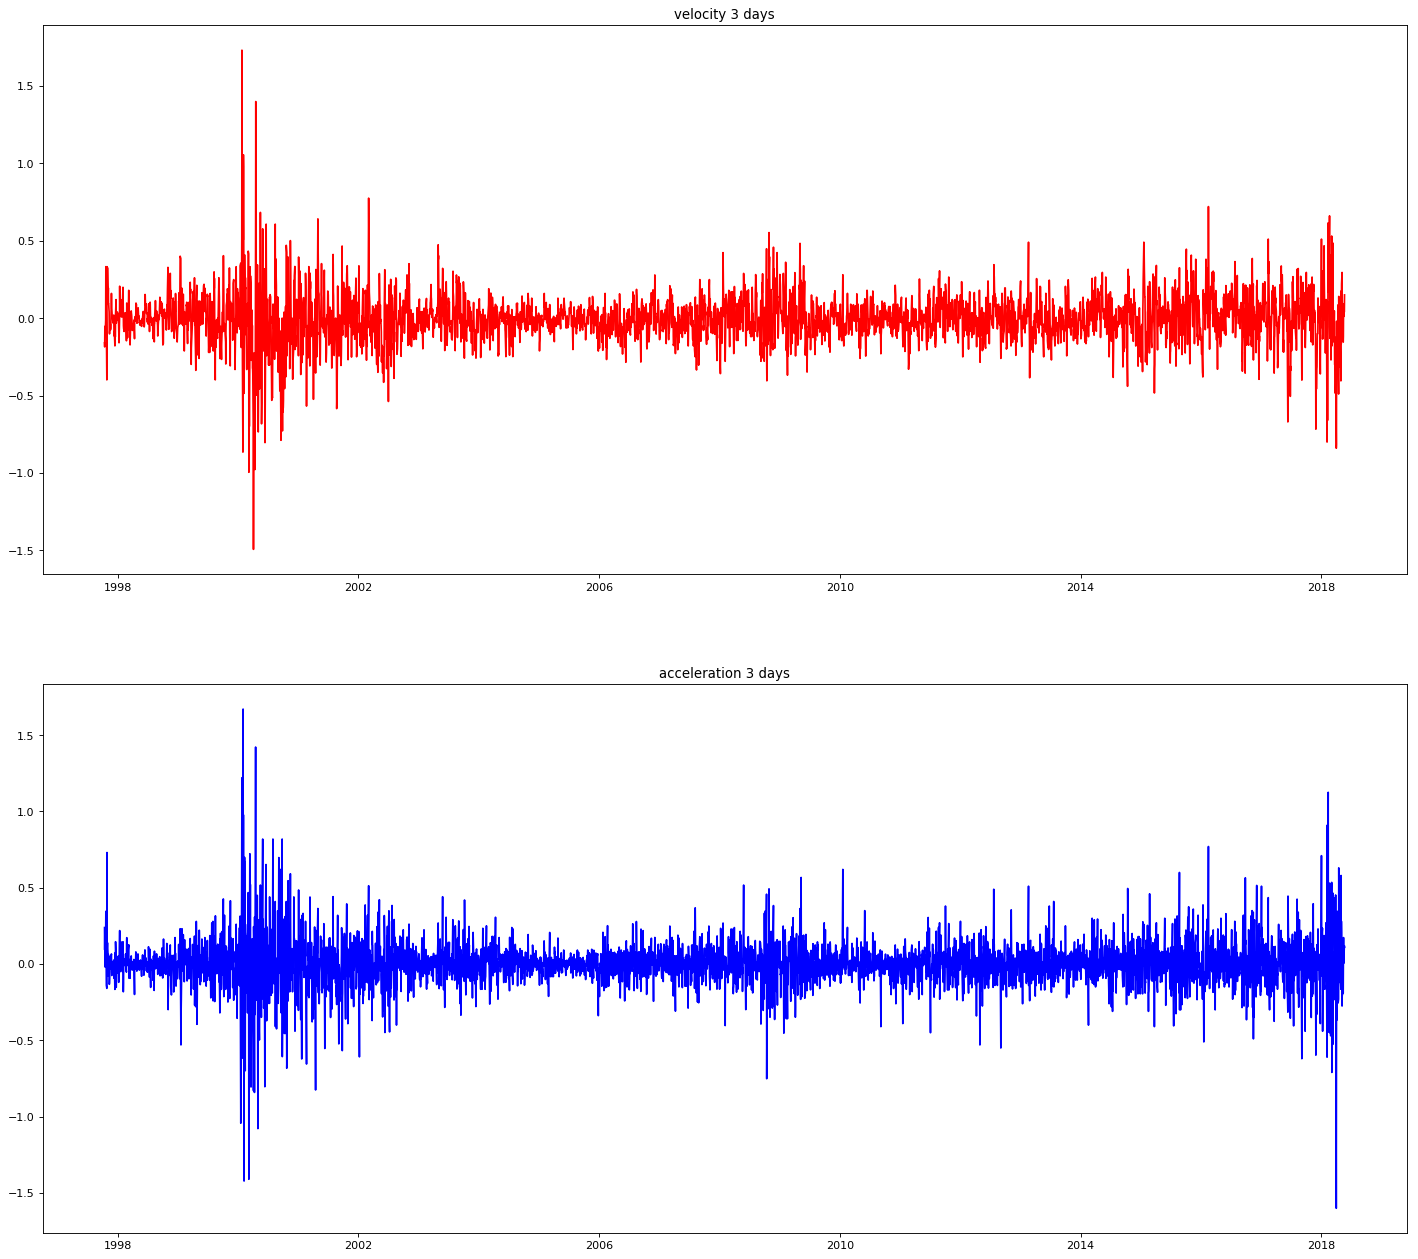

In [28]:
"""3 days"""
plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(211)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], threedays, "dailyvel"), orient='index')
xd.columns = ['dailyvel']
plt.plot_date(xd.index, xd['dailyvel'], 'r-')
plt.title("velocity 3 days")

plt.subplot(212)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], threedays, "acceleration"), orient='index')
xd.columns = ['acceleration']
plt.plot_date(xd.index, xd['acceleration'], 'b-')
plt.title("acceleration 3 days")

Text(0.5,1,'acceleration 1 week')

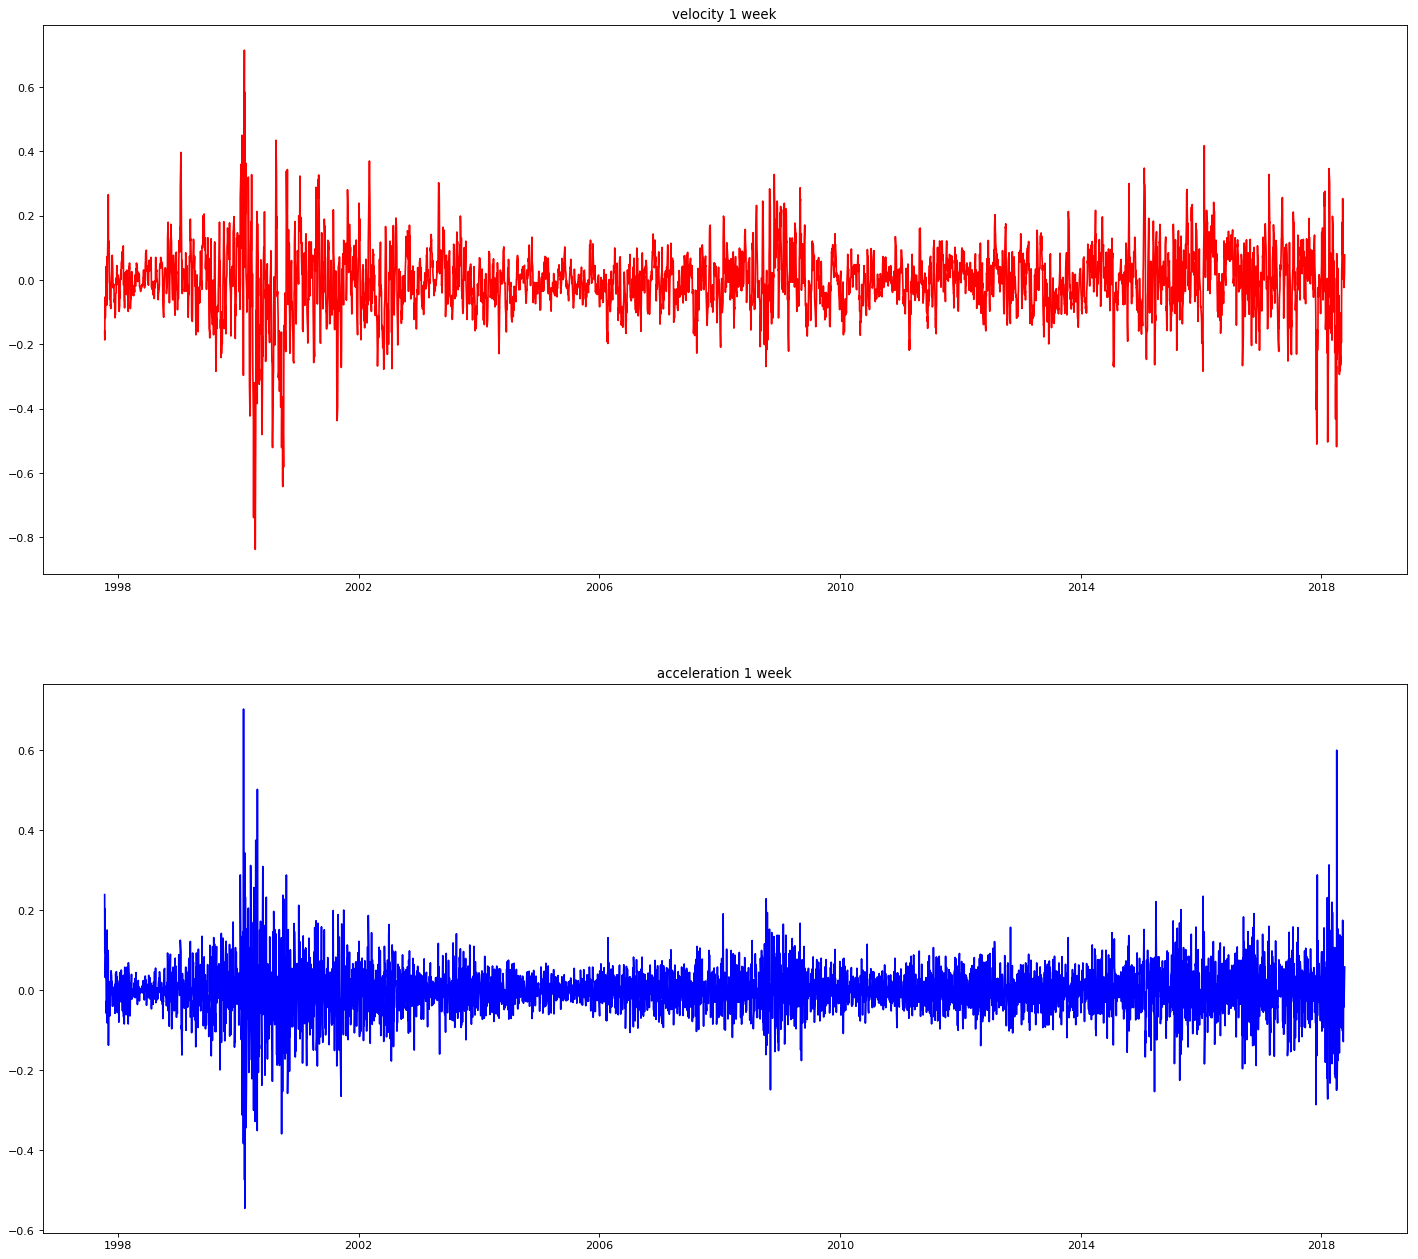

In [29]:
"""week velocity and acceleration"""
week = 7

plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(211)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], week, "dailyvel"), orient='index')
xd.columns = ['dailyvel']
plt.plot_date(xd.index, xd['dailyvel'], 'r-')
plt.title("velocity 1 week")

plt.subplot(212)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], week, "acceleration"), orient='index')
xd.columns = ['acceleration']
plt.plot_date(xd.index, xd['acceleration'], 'b-')
plt.title("acceleration 1 week")

Text(0.5,1,'acceleration 1 month')

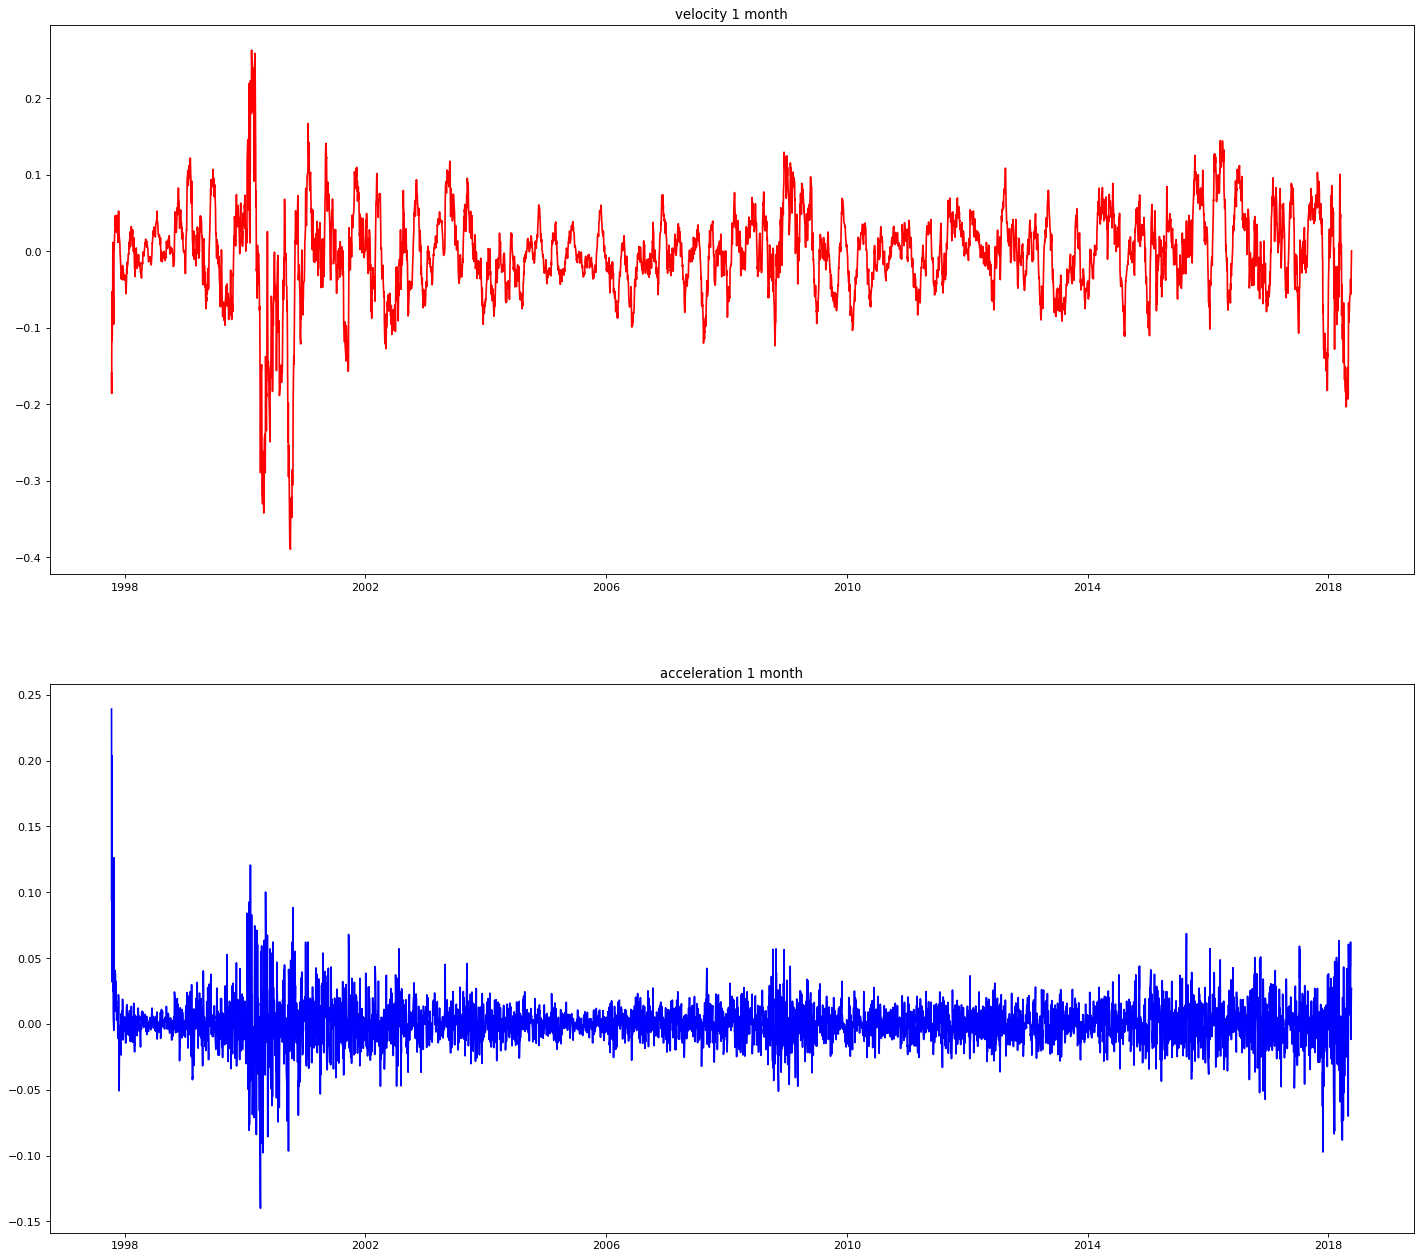

In [30]:
"""month velocity and acceleration"""
month = 30

plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(211)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], month, "dailyvel"), orient='index')
xd.columns = ['dailyvel']
plt.plot_date(xd.index, xd['dailyvel'], 'r-')
plt.title("velocity 1 month")

plt.subplot(212)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], month, "acceleration"), orient='index')
xd.columns = ['acceleration']
plt.plot_date(xd.index, xd['acceleration'], 'b-')
plt.title("acceleration 1 month")

Text(0.5,1,'acceleration 3 months')

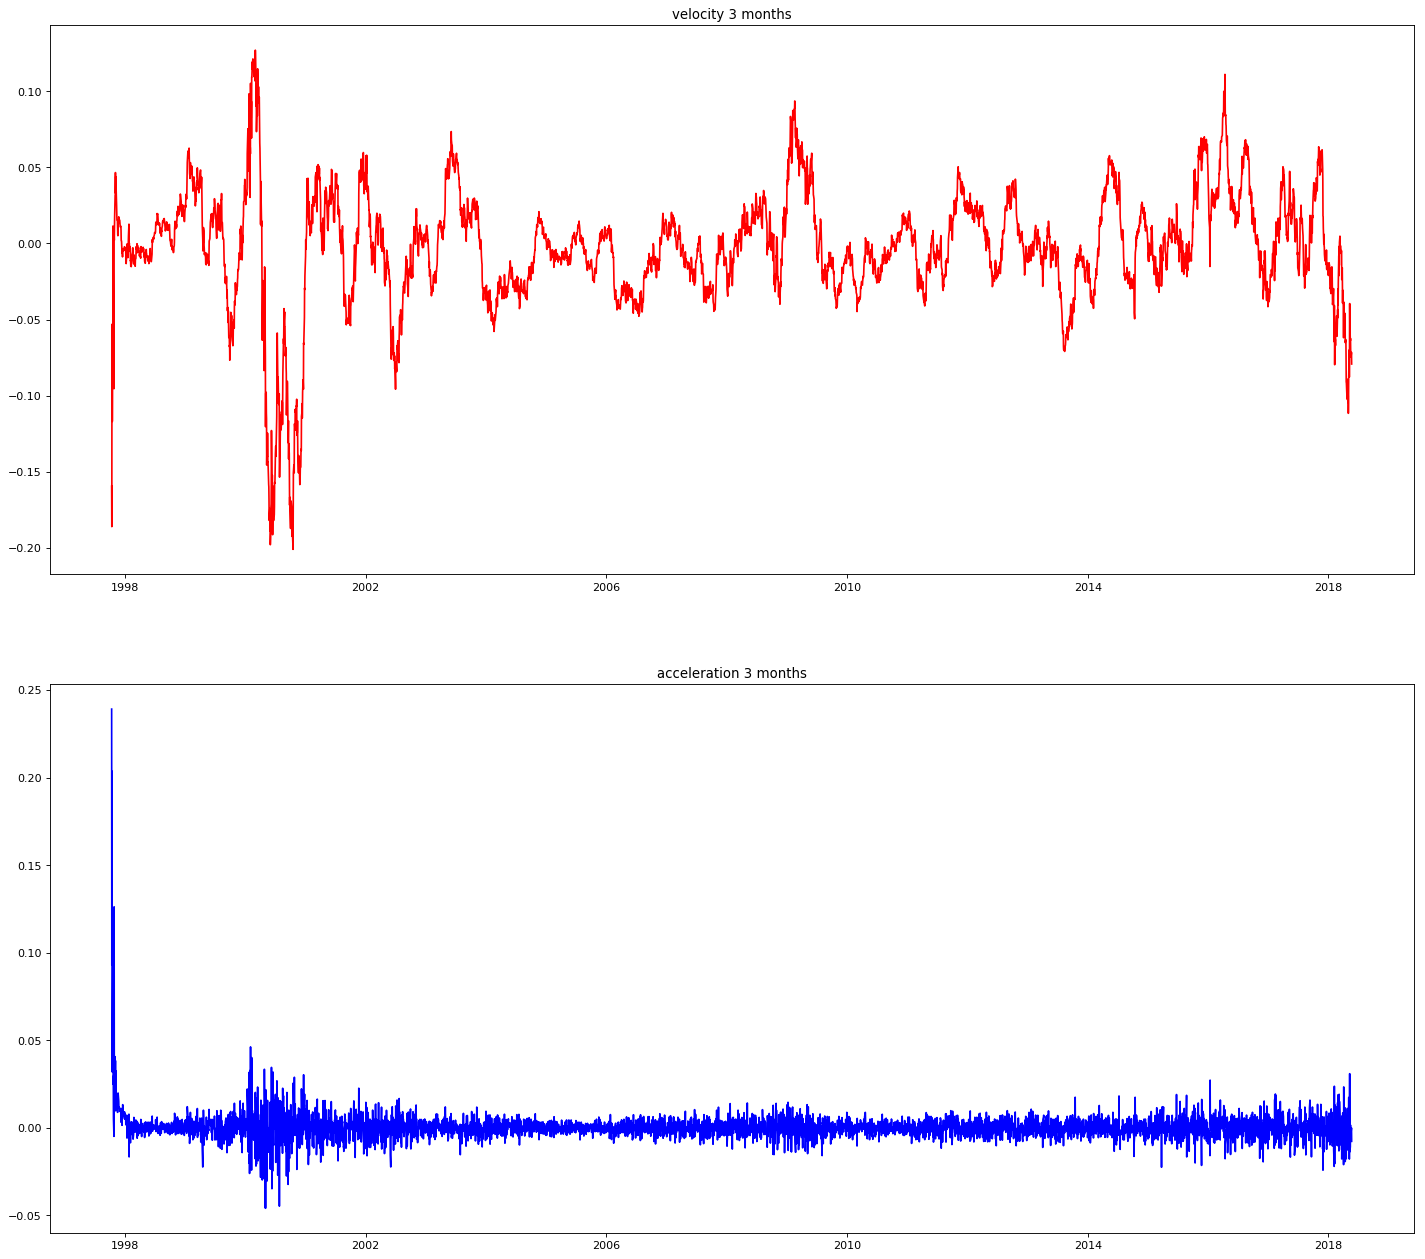

In [31]:
"""3 month velocity and acceleration"""
threemonth = 90

plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(211)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], threemonth, "dailyvel"), orient='index')
xd.columns = ['dailyvel']
plt.plot_date(xd.index, xd['dailyvel'], 'r-')
plt.title("velocity 3 months")

plt.subplot(212)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], threemonth, "acceleration"), orient='index')
xd.columns = ['acceleration']
plt.plot_date(xd.index, xd['acceleration'], 'b-')
plt.title("acceleration 3 months")

In [75]:
"""correlation between the acceleration and the volume. For this task generate a scatter plot and determine the R-square of the acceleration vs the volume. Do this for the 1 day, 3 day, 1 week, 1 month and 3-month averages"""

'correlation between the acceleration and the volume. For this task generate a scatter plot and determine the R-square of the acceleration vs the volume. Do this for the 1 day, 3 day, 1 week, 1 month and 3-month averages'

In [93]:
from scipy import stats

acc_1day = list(shit.iloc[2:]["acceleration"])
vel_1day = list(shit.iloc[2:]["dailyvel"])
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(acc_1day,vel_1day)
print("r-squared for 1 day:", r_value1**2)

acc_3day = cfilter(shit.iloc[2:], 3, "acceleration")
vel_3day = cfilter(shit.iloc[2:], 3, "dailyvel")
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(list(acc_3day.values()),list(vel_3day.values()))
print("r-squared for 3 days:", r_value3**2)


acc_week = cfilter(shit.iloc[2:], 7, "acceleration")
vel_week = cfilter(shit.iloc[2:], 7,"dailyvel")
slope7, intercept7, r_value7, p_value7, std_err7 = stats.linregress(list(acc_week.values()),list(vel_week.values()))
print ("r-squared for 1 week:", r_value7**2)

acc_mon = cfilter(shit.iloc[2:], 30, "acceleration")
vel_mon = cfilter(shit.iloc[2:], 30, "dailyvel")
slope30, intercept30, r_value30, p_value30, std_err30 = stats.linregress(list(acc_mon.values()),list(vel_mon.values()))
print ("r-squared for 1 month:", r_value30**2)

acc_3mon = cfilter(shit.iloc[2:], 90, "acceleration")
vel_3mon = cfilter(shit.iloc[2:], 90, "dailyvel")
slope90, intercept90, r_value90, p_value90, std_err90 = stats.linregress(list(acc_3mon.values()),list(vel_3mon.values()))
print ("r-squared for 3 months:", r_value90**2)

r-squared for 1 day: 0.5112730531716875
r-squared for 3 days: 0.2421681633270869
r-squared for 1 week: 0.0891003907190565
r-squared for 1 month: 0.012323669152954023
r-squared for 3 months: 0.0002439104947390644


KeyError: 'dailyvel'